In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import scipy
from scipy.stats import norm
from scipy.optimize import curve_fit 
from scipy import optimize

In [2]:
# change file extensions

def changeFileExtensions(folderPath, newFileType):
    """This function renames all files in a folder by changing their extensions to a desired one.

    Args:
    folderPath (str): The path to the folder containing the files to be renamed.
    newFileType (str): The new file extension (including the dot). For example: '.csv'
    """
    
    folder = os.path.expanduser(folderPath)
    files = os.listdir(folder)

    for file in files:
        fileName, ext = os.path.splitext(file)
        src = os.path.join(folder, file)  
        dst = os.path.join(folder, fileName + newFileType) 
        os.rename(src, dst)


In [3]:
changeFileExtensions('/home/ymatsumu/cmse890_project/code/spectra', '.csv')

In [9]:
def fit(xdata, ydata):
    """This fits the data with gaussian function. 

    Args:
    xdata (list): Independent variable of the data to fit.
    ydata (list): Dependent variable of the data to fit.
    """
    mean = sum(xdata * ydata) / sum(ydata)
    sigma = np.sqrt(sum(ydata * (xdata - mean) ** 2) / sum(ydata))
    # popt: optimal values for the parameters 
    # pcov: estimated approximate covariance of popt
    popt, pcov = curve_fit(gauss, xdata, ydata, p0=[min(ydata), max(ydata), mean, sigma])
    # perr: one standard deviation errors on the parameters
    perr = np.sqrt(np.diag(pcov))
    return popt, perr

def gauss(x, offset, A, mu, sigma):
    """This is a gaussian function. 
    It takes an independent variable as the first argument and the parameters to fit as separate remaining arguments.

    Args:
    x (list): Independent variable of the gaussian function.
    offset (float): Offset of the gaussian function.
    A (float): Amplitude of the gaussian function.
    mu (flaot): Mean of the x values.
    sigma (flaot): Standard deviation of the x values.
    """
    return offset + A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

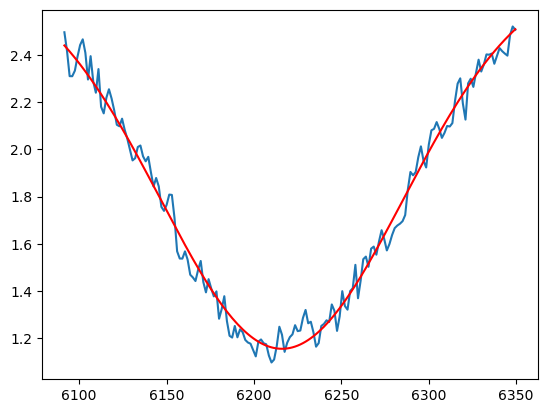

In [10]:
header = ['Wavelength', 'Flux']
df = pd.read_csv('spectra/sn1999ej-19991030.csv', delim_whitespace=True)
df.columns = header

wavelength = df.Wavelength
flux = df.Flux

df1 = df[(df.Wavelength > 6090) & (df.Wavelength < 6350)]
df1.columns = header
wavelength = df1.Wavelength
flux = df1.Flux

popt, perr = fit(wavelength, flux)

plt.plot(wavelength, flux, label='Data')
plt.plot(wavelength, gauss(wavelength, *popt), '-r', label='Fit')
plt.show()



In [11]:
popt

array([ 2.76175812e+00, -1.60718962e+00,  6.21599139e+03,  6.93224839e+01])

In [12]:
x = np.linspace(6090, 6350, 200)
y = []
for i in x:
    offset = popt[0]
    A = popt[1]
    mu = popt[2]
    sigma = popt[3]
    y.append(offset + A * np.exp(-(i - mu) ** 2 / (2 * sigma ** 2)))


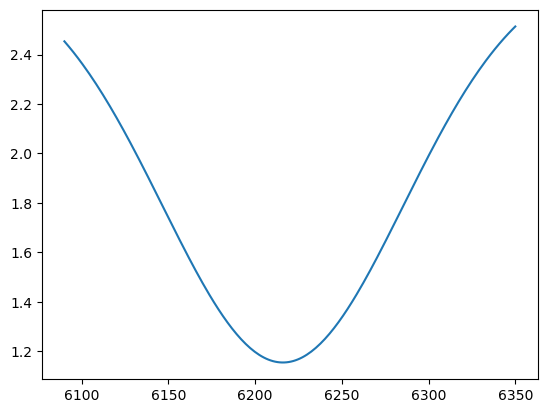

In [13]:
plt.plot(x, y)